# 📊 S&P 500 예측 시장 - 탐색적 데이터 분석 (EDA)

이 노트북에서는 Hull Tactical Market Prediction 데이터를 탐색합니다.

## 목표
1. 데이터 구조 이해
2. 결측치 패턴 분석
3. 피처 분포 확인
4. 타겟 변수 (forward_returns, market_forward_excess_returns) 분석
5. 시계열 트렌드 파악

In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 시각화 설정
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


## 1️⃣ 데이터 로드

In [3]:
# 데이터 경로
DATA_DIR = Path('../data/raw')

# 데이터 로드
train = pd.read_csv(DATA_DIR / 'train.csv')
test = pd.read_csv(DATA_DIR / 'test.csv')

print(f"📁 Train shape: {train.shape}")
print(f"📁 Test shape: {test.shape}")
print(f"\n✅ 데이터 로드 완료")

📁 Train shape: (9021, 98)
📁 Test shape: (10, 99)

✅ 데이터 로드 완료


## 2️⃣ 기본 정보 확인

In [4]:
# Train 데이터 기본 정보
print("=" * 80)
print("📋 TRAIN 데이터 정보")
print("=" * 80)
print(f"\n행 개수: {len(train):,}")
print(f"컬럼 개수: {len(train.columns)}")
print(f"\n컬럼 목록:")
print(train.columns.tolist())

print("\n" + "=" * 80)
print("첫 5개 행:")
print("=" * 80)
train.head()

📋 TRAIN 데이터 정보

행 개수: 9,021
컬럼 개수: 98

컬럼 목록:
['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']

첫 5개 행:


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [5]:
# Test 데이터 기본 정보
print("=" * 80)
print("📋 TEST 데이터 정보")
print("=" * 80)
print(f"\n행 개수: {len(test):,}")
print(f"컬럼 개수: {len(test.columns)}")
print(f"\n특별 컬럼:")
print(f"  - is_scored: {test['is_scored'].value_counts().to_dict()}")
print(f"  - lagged_forward_returns 존재: {'lagged_forward_returns' in test.columns}")
print(f"  - lagged_risk_free_rate 존재: {'lagged_risk_free_rate' in test.columns}")
print(f"  - lagged_market_forward_excess_returns 존재: {'lagged_market_forward_excess_returns' in test.columns}")

print("\n" + "=" * 80)
print("첫 5개 행:")
print("=" * 80)
test.head()

📋 TEST 데이터 정보

행 개수: 10
컬럼 개수: 99

특별 컬럼:
  - is_scored: {True: 9, False: 1}
  - lagged_forward_returns 존재: True
  - lagged_risk_free_rate 존재: True
  - lagged_market_forward_excess_returns 존재: True

첫 5개 행:


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V4,V5,V6,V7,V8,V9,is_scored,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,8980,0,0,0,0,1,0,0,1,0,...,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909,True,0.003541,0.000161,0.003068
1,8981,0,0,0,0,1,0,0,1,0,...,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,True,-0.005964,0.000162,-0.006437
2,8982,0,0,0,0,1,0,0,0,1,...,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,True,-0.007410,0.000160,-0.007882
3,8983,0,0,0,0,1,0,0,0,1,...,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,True,0.005420,0.000160,0.004949
4,8984,0,0,0,0,0,0,1,0,1,...,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,True,0.008357,0.000159,0.007887


## 3️⃣ 피처 그룹별 분류

In [6]:
# 피처 그룹화
feature_groups = {
    'M': [],  # Market Dynamics/Technical
    'E': [],  # Macro Economic
    'I': [],  # Interest Rate
    'P': [],  # Price/Valuation
    'V': [],  # Volatility
    'S': [],  # Sentiment
    'MOM': [],  # Momentum
    'D': []  # Dummy/Binary
}

for col in train.columns:
    if col.startswith('MOM'):
        feature_groups['MOM'].append(col)
    elif col.startswith('M'):
        feature_groups['M'].append(col)
    elif col.startswith('E'):
        feature_groups['E'].append(col)
    elif col.startswith('I'):
        feature_groups['I'].append(col)
    elif col.startswith('P'):
        feature_groups['P'].append(col)
    elif col.startswith('V'):
        feature_groups['V'].append(col)
    elif col.startswith('S'):
        feature_groups['S'].append(col)
    elif col.startswith('D'):
        feature_groups['D'].append(col)

print("=" * 80)
print("📦 피처 그룹별 개수")
print("=" * 80)
for group, features in feature_groups.items():
    print(f"{group:10s}: {len(features):3d}개 - {features[:3]}{'...' if len(features) > 3 else ''}")

print(f"\n총 피처 개수: {sum(len(v) for v in feature_groups.values())}")

📦 피처 그룹별 개수
M         :  18개 - ['M1', 'M10', 'M11']...
E         :  20개 - ['E1', 'E10', 'E11']...
I         :   9개 - ['I1', 'I2', 'I3']...
P         :  13개 - ['P1', 'P10', 'P11']...
V         :  13개 - ['V1', 'V10', 'V11']...
S         :  12개 - ['S1', 'S10', 'S11']...
MOM       :   0개 - []
D         :   9개 - ['D1', 'D2', 'D3']...

총 피처 개수: 94


## 4️⃣ 결측치 분석

In [7]:
# 결측치 통계
missing_stats = pd.DataFrame({
    'Missing Count': train.isnull().sum(),
    'Missing %': (train.isnull().sum() / len(train) * 100).round(2)
}).sort_values('Missing Count', ascending=False)

missing_stats = missing_stats[missing_stats['Missing Count'] > 0]

print("=" * 80)
print("🔍 결측치가 있는 컬럼 (상위 20개)")
print("=" * 80)
print(missing_stats.head(20))

print(f"\n결측치가 있는 컬럼 개수: {len(missing_stats)}개")
print(f"결측치 없는 컬럼 개수: {len(train.columns) - len(missing_stats)}개")

🔍 결측치가 있는 컬럼 (상위 20개)
     Missing Count  Missing %
E7            6969      77.25
V10           6049      67.05
S3            5733      63.55
M1            5547      61.49
M13           5540      61.41
M14           5540      61.41
M6            5043      55.90
V9            4539      50.32
S12           3537      39.21
M5            3283      36.39
M2            3217      35.66
S8            3009      33.36
M3            2018      22.37
E1            1784      19.78
P6            1638      18.16
E20           1616      17.91
P7            1616      17.91
P5            1574      17.45
V5            1512      16.76
S5            1511      16.75

결측치가 있는 컬럼 개수: 85개
결측치 없는 컬럼 개수: 13개


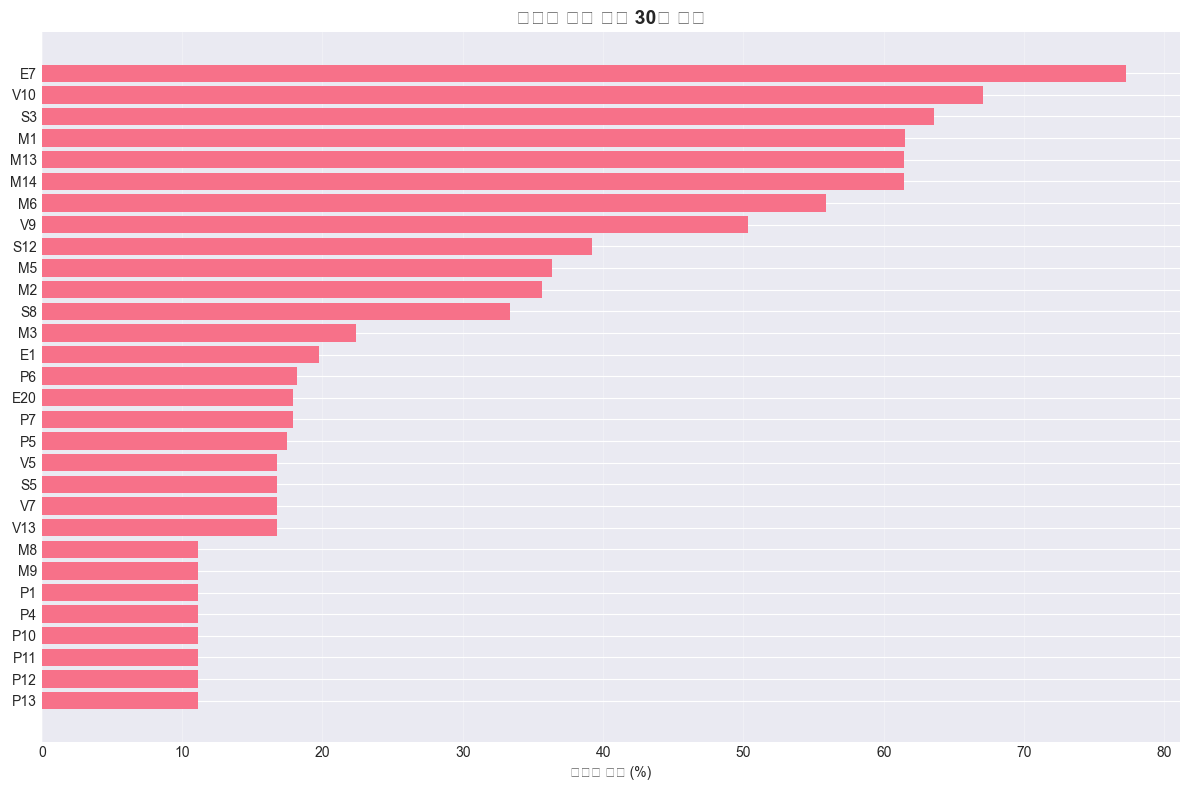

📊 결측치 비율이 높은 피처들이 초기 데이터(과거)에 집중되어 있을 가능성 확인 필요


In [8]:
# 결측치 시각화 (상위 30개)
plt.figure(figsize=(12, 8))
missing_top30 = missing_stats.head(30)
plt.barh(range(len(missing_top30)), missing_top30['Missing %'])
plt.yticks(range(len(missing_top30)), missing_top30.index)
plt.xlabel('결측치 비율 (%)')
plt.title('결측치 비율 상위 30개 피처', fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 결측치 비율이 높은 피처들이 초기 데이터(과거)에 집중되어 있을 가능성 확인 필요")

## 5️⃣ 타겟 변수 분석

In [9]:
# 타겟 변수 기본 통계
target_cols = ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']

print("=" * 80)
print("🎯 타겟 변수 기본 통계")
print("=" * 80)
print(train[target_cols].describe())

# 결측치 확인
print("\n결측치:")
print(train[target_cols].isnull().sum())

🎯 타겟 변수 기본 통계
       forward_returns  risk_free_rate  market_forward_excess_returns
count      9021.000000     9021.000000                    9021.000000
mean          0.000471        0.000107                       0.000053
std           0.010541        0.000088                       0.010558
min          -0.039754       -0.000004                      -0.040582
25%          -0.004319        0.000008                      -0.004747
50%           0.000659        0.000097                       0.000255
75%           0.005896        0.000193                       0.005479
max           0.040661        0.000317                       0.040551

결측치:
forward_returns                  0
risk_free_rate                   0
market_forward_excess_returns    0
dtype: int64


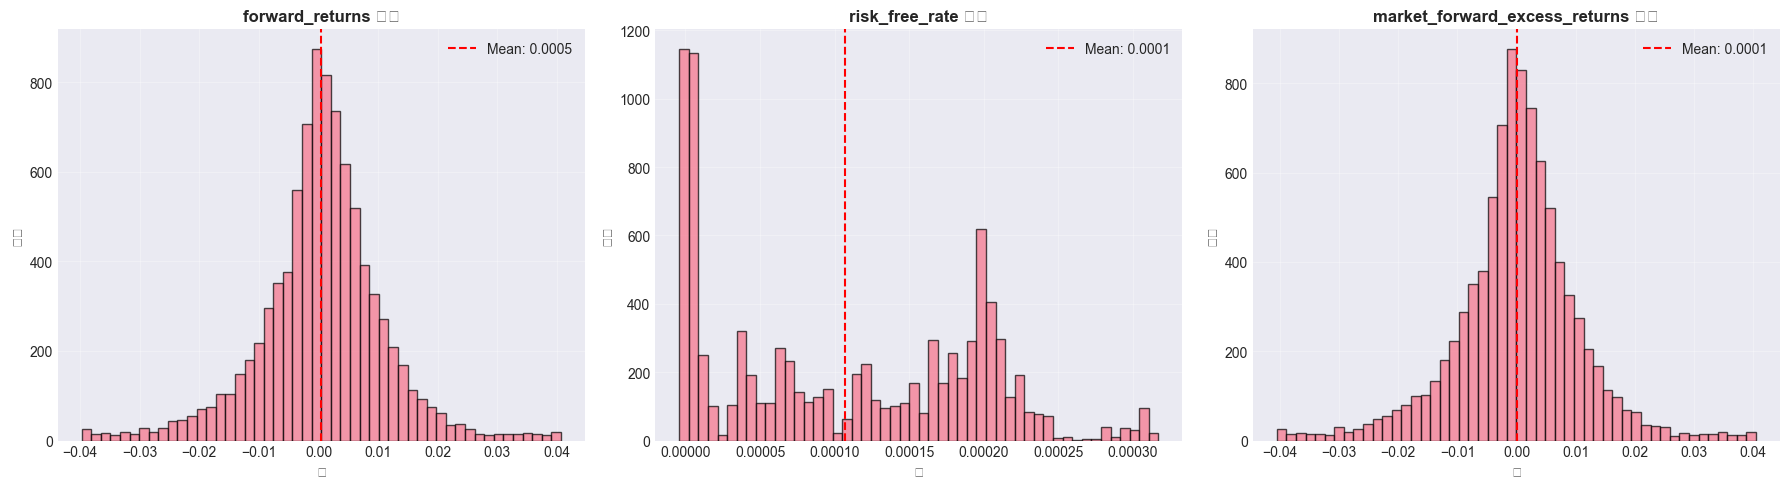

In [10]:
# 타겟 변수 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(target_cols):
    axes[i].hist(train[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col} 분포', fontsize=12, weight='bold')
    axes[i].set_xlabel('값')
    axes[i].set_ylabel('빈도')
    axes[i].axvline(train[col].mean(), color='red', linestyle='--', label=f'Mean: {train[col].mean():.4f}')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

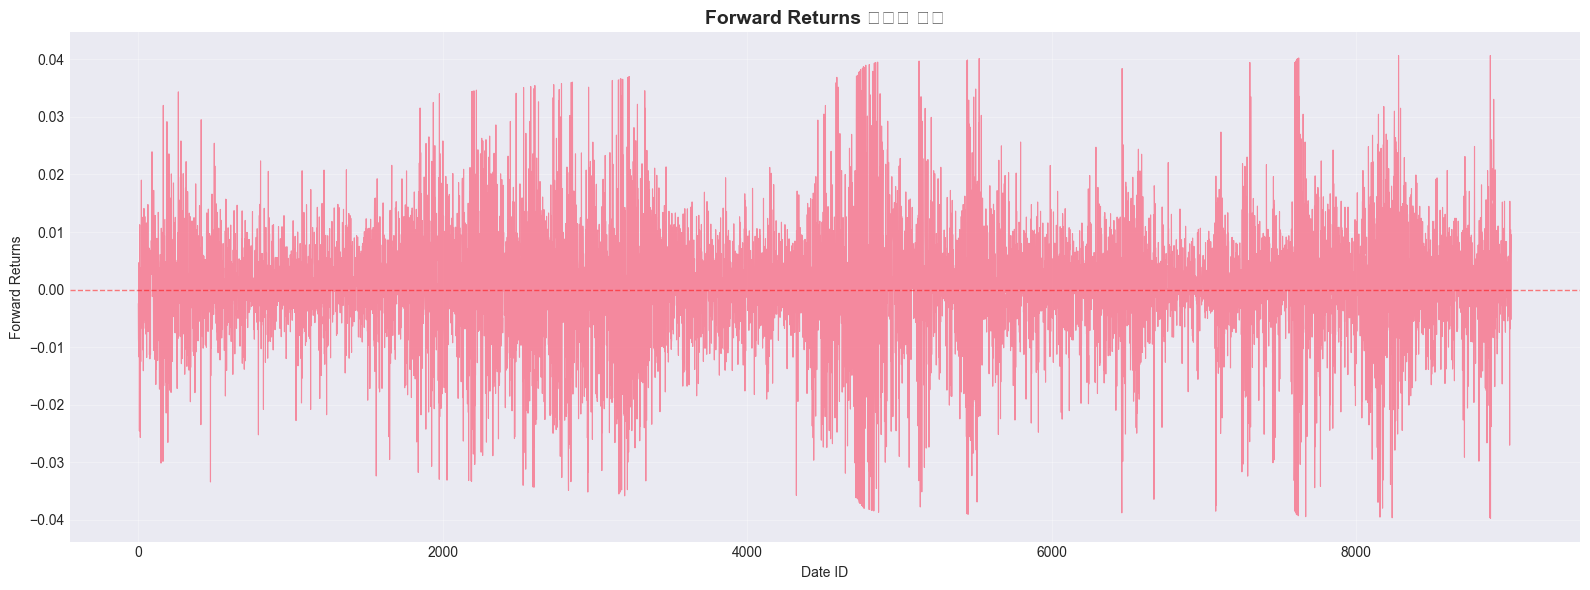

📈 시계열 변동성과 트렌드를 확인할 수 있습니다


In [11]:
# forward_returns 시계열 플롯
plt.figure(figsize=(16, 6))
plt.plot(train['date_id'], train['forward_returns'], linewidth=0.8, alpha=0.8)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.title('Forward Returns 시계열 추이', fontsize=14, weight='bold')
plt.xlabel('Date ID')
plt.ylabel('Forward Returns')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("📈 시계열 변동성과 트렌드를 확인할 수 있습니다")

## 6️⃣ 피처 간 상관관계 분석

In [12]:
# 타겟과 피처 간 상관관계 (결측치 적은 피처만)
# 결측치 30% 이하인 피처만 선택
low_missing_cols = missing_stats[missing_stats['Missing %'] < 30].index.tolist()
all_numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
selected_cols = [col for col in all_numeric_cols if col not in target_cols and (col not in missing_stats.index or col in low_missing_cols)]

# forward_returns와의 상관관계 계산
correlations = train[selected_cols + ['forward_returns']].corr()['forward_returns'].drop('forward_returns').sort_values(ascending=False)

print("=" * 80)
print("🔗 forward_returns와 상관관계가 높은 피처 (상위 20개)")
print("=" * 80)
print(correlations.head(20))

print("\n" + "=" * 80)
print("🔗 forward_returns와 상관관계가 낮은 피처 (하위 20개)")
print("=" * 80)
print(correlations.tail(20))

🔗 forward_returns와 상관관계가 높은 피처 (상위 20개)
V13    0.063069
S5     0.040469
D2     0.033951
D1     0.033951
V7     0.032741
M17    0.024900
D8     0.024859
E19    0.024821
S6     0.022344
D4     0.016953
D6     0.016696
D5     0.016676
M3     0.016459
E6     0.015528
E9     0.014402
D7     0.010526
E1     0.008651
V6     0.007981
M10    0.007534
M11    0.006985
Name: forward_returns, dtype: float64

🔗 forward_returns와 상관관계가 낮은 피처 (하위 20개)
M7    -0.006811
E18   -0.008302
E13   -0.008610
P11   -0.009281
S7    -0.011419
P3    -0.011849
S9    -0.012614
M18   -0.013050
P10   -0.016675
P7    -0.021678
P12   -0.021858
I2    -0.022723
P5    -0.023120
M12   -0.023940
M8    -0.023961
P8    -0.026106
E12   -0.029627
E11   -0.030872
S2    -0.037614
M4    -0.066756
Name: forward_returns, dtype: float64


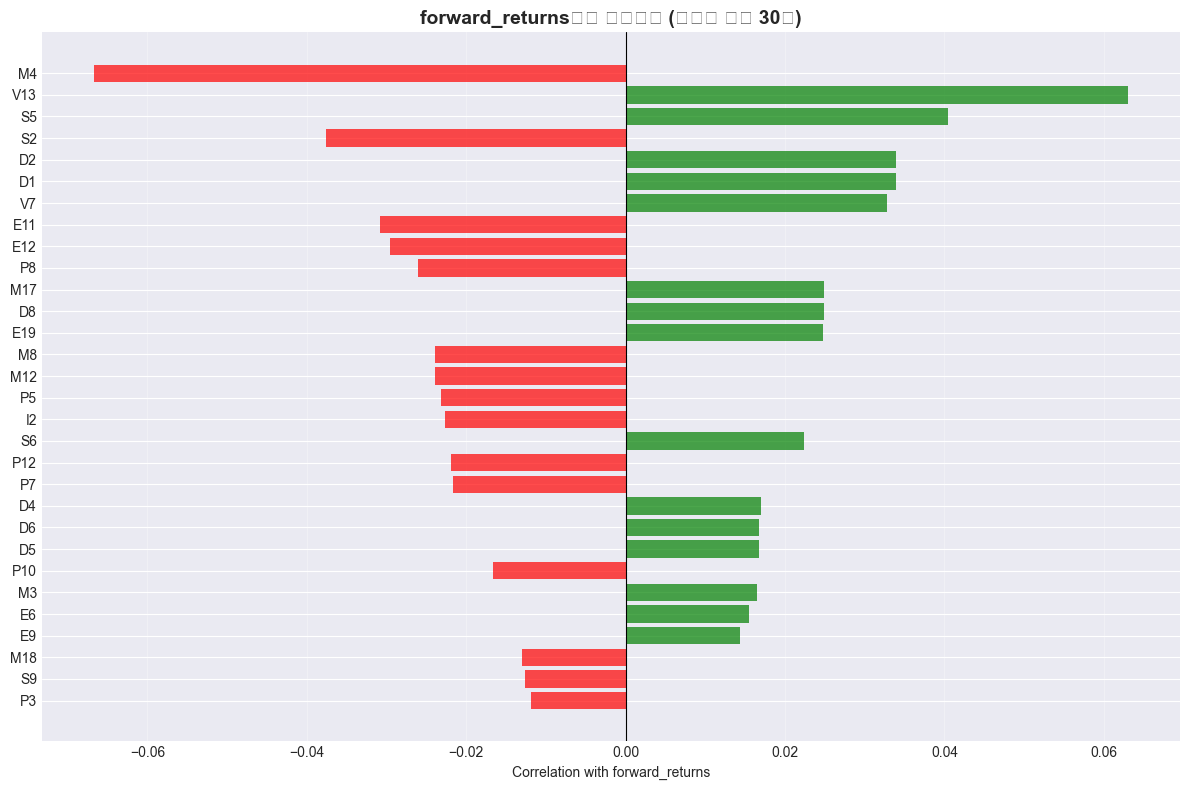

In [13]:
# 상관관계 시각화
plt.figure(figsize=(12, 8))
top_features = correlations.abs().sort_values(ascending=False).head(30)
colors = ['green' if x > 0 else 'red' for x in correlations[top_features.index]]
plt.barh(range(len(top_features)), correlations[top_features.index], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlation with forward_returns')
plt.title('forward_returns와의 상관관계 (절댓값 상위 30개)', fontsize=14, weight='bold')
plt.axvline(0, color='black', linewidth=0.8)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7️⃣ Test 데이터의 lagged 피처 확인

In [14]:
# Test 데이터의 lagged 컬럼 확인
lagged_cols = ['lagged_forward_returns', 'lagged_risk_free_rate', 'lagged_market_forward_excess_returns']

print("=" * 80)
print("🔄 TEST 데이터의 Lagged 피처 통계")
print("=" * 80)
print(test[lagged_cols].describe())

print("\n" + "=" * 80)
print("is_scored별 lagged 피처 통계")
print("=" * 80)
print(test[test['is_scored']][lagged_cols].describe())

🔄 TEST 데이터의 Lagged 피처 통계
       lagged_forward_returns  lagged_risk_free_rate  \
count               10.000000              10.000000   
mean                 0.001702               0.000158   
std                  0.005482               0.000002   
min                 -0.007410               0.000155   
25%                 -0.001594               0.000156   
50%                  0.002674               0.000159   
75%                  0.004950               0.000160   
max                  0.008357               0.000162   

       lagged_market_forward_excess_returns  
count                             10.000000  
mean                               0.001232  
std                                0.005483  
min                               -0.007882  
25%                               -0.002063  
50%                                0.002207  
75%                                0.004479  
max                                0.007887  

is_scored별 lagged 피처 통계
       lagged_forward_returns  

## 8️⃣ 주요 인사이트 정리

### 📌 발견 사항

1. **데이터 크기**
   - Train: 9,021개 행, 98개 컬럼
   - Test: 10개 행, 99개 컬럼 (is_scored + lagged 컬럼 추가)

2. **결측치 패턴**
   - 상당수 피처에서 결측치 존재 (특히 초기 데이터)
   - 모델링 시 결측치 처리 전략 필요

3. **타겟 변수**
   - `forward_returns`: 일일 수익률
   - `market_forward_excess_returns`: 시장 초과 수익률 (이미 전처리됨)
   - 변동성이 크고 정규분포에 가까움

4. **피처 그룹**
   - 8개 카테고리로 분류된 피처들
   - 각 그룹의 특성을 활용한 피처 엔지니어링 가능

### ✅ 다음 단계

1. **베이스라인 모델 구축** (Position = 1.0)
2. **결측치 처리 전략 수립**
3. **피처 엔지니어링**
4. **LightGBM 모델 학습**

---

## 💾 분석 결과 저장

In [15]:
# 결측치 리포트 저장
missing_stats.to_csv('../results/missing_values_report.csv')

# 상관관계 리포트 저장
correlations.to_csv('../results/feature_correlations.csv')

print("✅ 분석 결과가 results 폴더에 저장되었습니다")
print("   - missing_values_report.csv")
print("   - feature_correlations.csv")

✅ 분석 결과가 results 폴더에 저장되었습니다
   - missing_values_report.csv
   - feature_correlations.csv



---
# 📈 Part 2: Advanced Time Series Analysis
*(Merged from 02_timeseries_analysis.ipynb)*

## 2️⃣ 자기상관 분석 (Autocorrelation)

각 피처가 과거 값과 얼마나 상관관계가 있는지 확인합니다.
- **높은 자기상관** → 시계열 의존성 강함 → Purge gap 필요
- **낮은 자기상관** → 시계열 의존성 약함 → Purge gap 불필요

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf


def analyze_autocorrelation(data, feature_name, lags=100, plot=True):
    """
    피처의 자기상관 분석
    
    Parameters
    ----------
    data : pd.Series
        분석할 피처 데이터
    feature_name : str
        피처 이름
    lags : int
        분석할 시차 개수
    plot : bool
        그래프 출력 여부
    
    Returns
    -------
    dict
        자기상관 통계
    """
    # 결측치 제거
    clean_data = data.dropna()
    
    if len(clean_data) < lags * 2:
        print(f"⚠️  {feature_name}: 데이터가 부족합니다.")
        return None
    
    # ACF 계산
    acf_values = acf(clean_data, nlags=lags, fft=False)
    
    # 통계 계산
    # 통계 계산 (안전한 버전)
    stats = {
        'feature': feature_name,
        'acf_lag1': acf_values[1] if len(acf_values) > 1 else np.nan,
        'acf_lag5': acf_values[5] if len(acf_values) > 5 else np.nan,
        'acf_lag10': acf_values[10] if len(acf_values) > 10 else np.nan,
        'acf_lag50': acf_values[50] if len(acf_values) > 50 else np.nan,
        'acf_lag100': acf_values[100] if len(acf_values) > 100 else np.nan,
        'max_acf': np.max(np.abs(acf_values[1:])),
        'mean_acf': np.mean(np.abs(acf_values[1:6])),
    }
    
    # 시각화
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        
        # ACF Plot
        plot_acf(clean_data, lags=lags, ax=axes[0])
        axes[0].set_title(f'ACF - {feature_name}', fontsize=12, weight='bold')
        axes[0].axhline(y=0.2, color='r', linestyle='--', alpha=0.5, label='Threshold (0.2)')
        axes[0].axhline(y=-0.2, color='r', linestyle='--', alpha=0.5)
        axes[0].legend()
        
        # PACF Plot
        plot_pacf(clean_data, lags=lags, ax=axes[1])
        axes[1].set_title(f'PACF - {feature_name}', fontsize=12, weight='bold')
        
        plt.tight_layout()
        plt.show()
    
    return stats

### 타겟 변수 자기상관

In [ ]:
# Forward Returns 자기상관
print("="*80)
print("🎯 타겟 변수: forward_returns")
print("="*80)
target_stats = analyze_autocorrelation(train['forward_returns'], 'forward_returns', lags=100, plot=True)

print(f"\n📊 자기상관 통계:")
print(f"  Lag-1: {target_stats['acf_lag1']:.4f}")
print(f"  Lag-5: {target_stats['acf_lag5']:.4f}")
print(f"  Lag 1-5 평균: {target_stats['mean_acf']:.4f}")

if target_stats['acf_lag5'] > 0.2:
    print("\n⚠️  Lag-5 자기상관이 높음 → Purge gap 필요할 수 있음")
else:
    print("\n✅ Lag-5 자기상관이 낮음 → Purge gap 불필요할 수 있음")

🎯 타겟 변수: forward_returns

📊 자기상관 통계:
  Lag-1: -0.0448
  Lag-5: -0.0234
  Lag 1-5 평균: 0.0232

✅ Lag-5 자기상관이 낮음 → Purge gap 불필요할 수 있음


### 주요 피처 그룹별 자기상관

In [41]:
# 각 그룹에서 대표 피처 선택 (결측치 적은 순)
representative_features = {}

for group, features in feature_groups.items():
    if len(features) == 0:
        continue
    
    # 결측치가 가장 적은 피처 선택
    missing_counts = train[features].isnull().sum()
    best_feature = missing_counts.idxmin()
    representative_features[group] = best_feature

print("대표 피처 (그룹별):")
for group, feature in representative_features.items():
    print(f"  {group}: {feature}")

대표 피처 (그룹별):
  M: M10
  E: E10
  I: I1
  P: P1
  V: V1
  S: S1
  D: D1


In [59]:
import os

# ==========================================
# ⚙️ 설정 (여기만 바꾸면 됩니다)
# ==========================================
ANALYZE_ALL = False          # True: 모든 컬럼 분석, False: 아래 지정한 컬럼만 분석
TARGET_COLS = ['S11']      # 분석하고 싶은 특정 컬럼 리스트 (ANALYZE_ALL = False일 때 사용)
LAGS = 1000                 # 분석할 시차(Lag) 길이
SAVE_DIR = '../data/acf_plots'
# ==========================================

# 저장할 폴더 생성
os.makedirs(SAVE_DIR, exist_ok=True)

def analyze_and_save_autocorrelation(data, feature_name, lags=100, save_dir=None):
    """
    피처의 자기상관 분석 및 저장
    """
    # 결측치 제거
    clean_data = data.dropna()
    
    if len(clean_data) < lags * 2:
        return None
    
    # ACF 계산
    try:
        acf_values = acf(clean_data, nlags=lags, fft=False)
    except:
        return None
    
    # 통계 계산
    stats = {
        'feature': feature_name,
        'acf_lag1': acf_values[1] if len(acf_values) > 1 else np.nan,
        'acf_lag5': acf_values[5] if len(acf_values) > 5 else np.nan,
        'acf_lag10': acf_values[10] if len(acf_values) > 10 else np.nan,
        'max_acf': np.max(np.abs(acf_values[1:])),
        'mean_acf': np.mean(np.abs(acf_values[1:6])),
    }
    
    # 시각화 및 저장
    if save_dir:
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        
        # ACF Plot
        plot_acf(clean_data, lags=lags, ax=axes[0])
        axes[0].set_title(f'ACF - {feature_name}', fontsize=12, weight='bold')
        axes[0].axhline(y=0.2, color='r', linestyle='--', alpha=0.5, label='Threshold (0.2)')
        axes[0].axhline(y=-0.2, color='r', linestyle='--', alpha=0.5)
        axes[0].legend()
        
        # PACF Plot
        plot_pacf(clean_data, lags=lags, ax=axes[1])
        axes[1].set_title(f'PACF - {feature_name}', fontsize=12, weight='bold')
        
        plt.tight_layout()
        plt.savefig(f"{save_dir}/{feature_name}_acf.png")
        plt.close(fig) # 메모리 해제
    
    return stats

# 실행 로직
print(f"📊 자기상관 분석 시작 (Mode: {'ALL' if ANALYZE_ALL else 'TARGET'}, Lags={LAGS})...")

all_stats = []
exclude_cols = ['date_id', 'time_id', 'row_id', 'target', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns', 'is_scored']

# 분석 대상 컬럼 선정
if ANALYZE_ALL:
    cols_to_analyze = [c for c in train.columns if c not in exclude_cols]
else:
    cols_to_analyze = [c for c in TARGET_COLS if c in train.columns]

# 루프 실행
for i, col in enumerate(cols_to_analyze):
    print(f"Processing {col} ({i+1}/{len(cols_to_analyze)})...", end='\r')
    
    stats = analyze_and_save_autocorrelation(train[col], col, lags=LAGS, save_dir=SAVE_DIR)
    
    if stats:
        all_stats.append(stats)

print(f"\n✅ 분석 완료! 그래프가 {SAVE_DIR} 폴더에 저장되었습니다.")

# 통계 데이터프레임 생성 및 출력
if all_stats:
    acf_stats_df = pd.DataFrame(all_stats)
    display(acf_stats_df.sort_values('acf_lag1', ascending=False).head(10))
else:
    print("⚠️ 분석된 결과가 없습니다.")

📊 자기상관 분석 시작 (Mode: TARGET, Lags=1000)...
Processing S11 (1/1)...
✅ 분석 완료! 그래프가 ../data/acf_plots 폴더에 저장되었습니다.


,feature,acf_lag1,acf_lag5,acf_lag10,max_acf,mean_acf
0,S11,0.67811,0.485323,0.475495,0.67811,0.539067


In [43]:
# 모든 피처에 대해 실행
print("📊 모든 피처에 대한 자기상관 분석 시작...")
all_stats = []
exclude_cols = ['date_id', 'time_id', 'row_id', 'target', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns', 'is_scored']

for i, col in enumerate(train.columns):
    if col in exclude_cols: continue
    
    if i % 10 == 0:
        print(f"Processing {col} ({i}/{len(train.columns)})...", end='\r')
        
    stats = analyze_and_save_autocorrelation(train[col], col, lags=100, save_dir=save_dir)
    if stats:
        all_stats.append(stats)

print("\n✅ 모든 그래프가 data/acf_plots 폴더에 저장되었습니다!")

# 통계 데이터프레임 생성
acf_stats_df = pd.DataFrame(all_stats)
acf_stats_df.sort_values('acf_lag1', ascending=False).head(10)

📊 모든 피처에 대한 자기상관 분석 시작...


NameError: name 'analyze_and_save_autocorrelation' is not defined

In [60]:
# 그룹별 대표 피처 자기상관 분석
group_acf_stats = []

for group, feature in representative_features.items():
    print(f"\n{'='*80}")
    print(f"📊 {group} 그룹: {feature}")
    print(f"{'='*80}")
    
    stats = analyze_autocorrelation(train[feature], feature, lags=100, plot=True)
    
    if stats:
        stats['group'] = group
        group_acf_stats.append(stats)
        
        print(f"\n자기상관:")
        print(f"  Lag-1: {stats['acf_lag1']:.4f}")
        print(f"  Lag-5: {stats['acf_lag5']:.4f}")
        print(f"  Lag 1-5 평균: {stats['mean_acf']:.4f}")


📊 M 그룹: M10

자기상관:
  Lag-1: 0.9934
  Lag-5: 0.9648
  Lag 1-5 평균: 0.9793

📊 E 그룹: E10

자기상관:
  Lag-1: 0.9982
  Lag-5: 0.9912
  Lag 1-5 평균: 0.9947

📊 I 그룹: I1

자기상관:
  Lag-1: 0.9925
  Lag-5: 0.9667
  Lag 1-5 평균: 0.9794

📊 P 그룹: P1

자기상관:
  Lag-1: 0.9813
  Lag-5: 0.9462
  Lag 1-5 평균: 0.9627

📊 V 그룹: V1

자기상관:
  Lag-1: 0.9917
  Lag-5: 0.9681
  Lag 1-5 평균: 0.9796

📊 S 그룹: S1

자기상관:
  Lag-1: 0.9991
  Lag-5: 0.9874
  Lag 1-5 평균: 0.9938

📊 D 그룹: D1

자기상관:
  Lag-1: -0.0326
  Lag-5: -0.0326
  Lag 1-5 평균: 0.0326


### 자기상관 요약

📊 그룹별 자기상관 요약 (Lag-5 기준)
group feature  acf_lag1  acf_lag5  mean_acf
    E     E10  0.998247  0.991198  0.994726
    S      S1  0.999093  0.987420  0.993765
    V      V1  0.991654  0.968147  0.979589
    I      I1  0.992523  0.966728  0.979388
    M     M10  0.993407  0.964761  0.979251
    P      P1  0.981347  0.946219  0.962705
    D      D1 -0.032627 -0.032642  0.032634


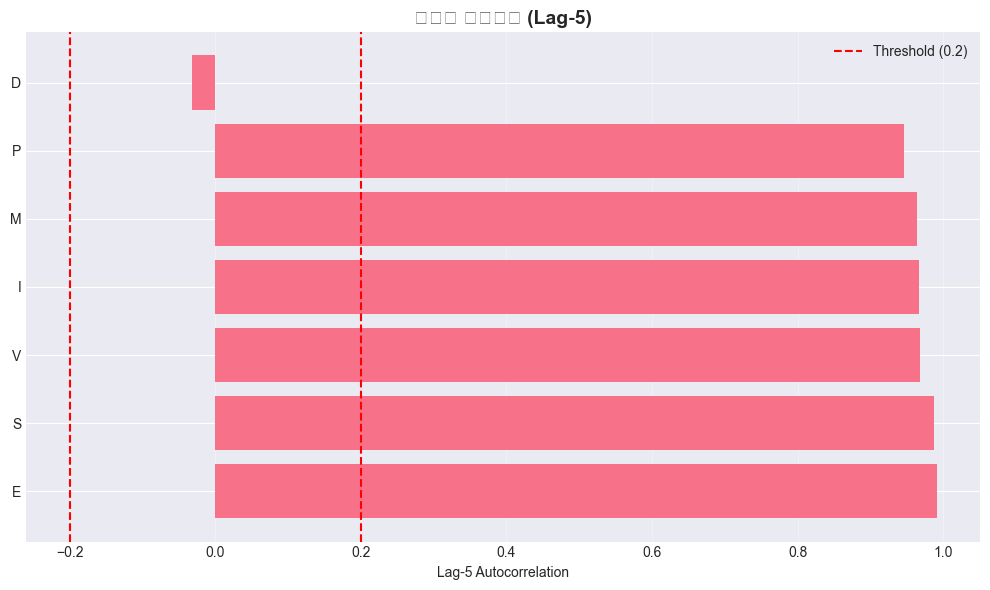


⚠️  높은 자기상관 그룹: E, S, V, I, M, P
→ 이 그룹들은 시계열 의존성이 강함


In [61]:
# 자기상관 통계 DataFrame
acf_df = pd.DataFrame(group_acf_stats)
acf_df = acf_df.sort_values('acf_lag5', ascending=False)

print("="*80)
print("📊 그룹별 자기상관 요약 (Lag-5 기준)")
print("="*80)
print(acf_df[['group', 'feature', 'acf_lag1', 'acf_lag5', 'mean_acf']].to_string(index=False))

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(acf_df['group'], acf_df['acf_lag5'])
plt.axvline(x=0.2, color='r', linestyle='--', label='Threshold (0.2)')
plt.axvline(x=-0.2, color='r', linestyle='--')
plt.xlabel('Lag-5 Autocorrelation')
plt.title('그룹별 자기상관 (Lag-5)', fontsize=14, weight='bold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 판단
high_acf_groups = acf_df[acf_df['acf_lag5'].abs() > 0.2]['group'].tolist()
if high_acf_groups:
    print(f"\n⚠️  높은 자기상관 그룹: {', '.join(high_acf_groups)}")
    print("→ 이 그룹들은 시계열 의존성이 강함")
else:
    print("\n✅ 모든 그룹의 Lag-5 자기상관이 낮음 (<0.2)")
    print("→ 시계열 의존성이 약함")

## 3️⃣ 피처 간 시차 상관관계

T일의 피처가 T+k일의 타겟에 영향을 주는지 확인

In [62]:
def calculate_lag_correlation(df, feature, target, max_lag=10):
    """
    피처와 타겟 간 시차 상관관계 계산
    
    Parameters
    ----------
    df : pd.DataFrame
        데이터
    feature : str
        피처 이름
    target : str
        타겟 이름
    max_lag : int
        최대 시차
    
    Returns
    -------
    dict
        시차별 상관계수
    """
    correlations = {}
    
    for lag in range(0, max_lag + 1):
        if lag == 0:
            # 동일 시점
            corr = df[[feature, target]].corr().iloc[0, 1]
        else:
            # Lag만큼 뒤
            feature_shifted = df[feature].shift(lag)
            corr = pd.concat([feature_shifted, df[target]], axis=1).corr().iloc[0, 1]
        
        correlations[f'lag_{lag}'] = corr
    
    return correlations

In [63]:
# 대표 피처들의 시차 상관관계
lag_corr_results = []

for group, feature in representative_features.items():
    print(f"Calculating lag correlations for {group}: {feature}...")
    
    lag_corrs = calculate_lag_correlation(
        train, 
        feature, 
        'forward_returns', 
        max_lag=10
    )
    
    lag_corrs['group'] = group
    lag_corrs['feature'] = feature
    lag_corr_results.append(lag_corrs)

lag_corr_df = pd.DataFrame(lag_corr_results)
print("\n✅ 시차 상관관계 계산 완료")

Calculating lag correlations for M: M10...
Calculating lag correlations for E: E10...
Calculating lag correlations for I: I1...
Calculating lag correlations for P: P1...
Calculating lag correlations for V: V1...
Calculating lag correlations for S: S1...
Calculating lag correlations for D: D1...

✅ 시차 상관관계 계산 완료


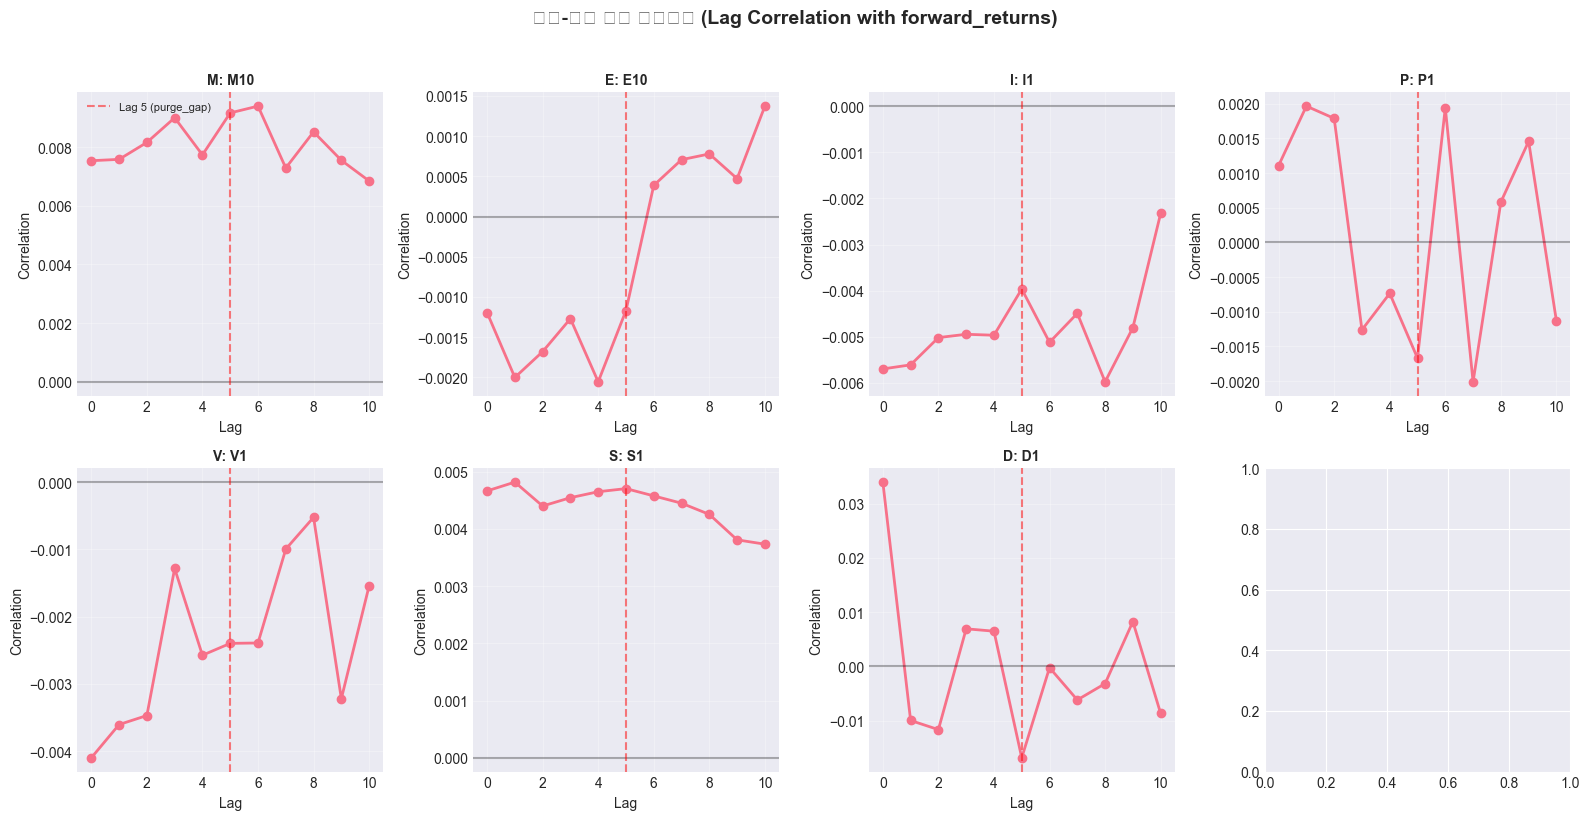

In [64]:
# 시각화
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, (_, row) in enumerate(lag_corr_df.iterrows()):
    if idx >= len(axes):
        break
    
    lags = list(range(11))
    corrs = [row[f'lag_{i}'] for i in lags]
    
    axes[idx].plot(lags, corrs, marker='o', linewidth=2)
    axes[idx].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[idx].axvline(x=5, color='r', linestyle='--', alpha=0.5, label='Lag 5 (purge_gap)')
    axes[idx].set_title(f"{row['group']}: {row['feature']}", fontsize=10, weight='bold')
    axes[idx].set_xlabel('Lag')
    axes[idx].set_ylabel('Correlation')
    axes[idx].grid(alpha=0.3)
    
    if idx == 0:
        axes[idx].legend(fontsize=8)

plt.suptitle('피처-타겟 시차 상관관계 (Lag Correlation with forward_returns)', 
             fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [65]:
# Lag 5 상관관계 확인
print("="*80)
print("📊 Lag-5 상관관계 (purge_gap 지점)")
print("="*80)

lag5_analysis = lag_corr_df[['group', 'feature', 'lag_0', 'lag_5']].copy()
lag5_analysis['decay'] = ((lag5_analysis['lag_0'] - lag5_analysis['lag_5']) / 
                          lag5_analysis['lag_0'].abs() * 100)

print(lag5_analysis.to_string(index=False))

# 분석
significant_lag5 = lag5_analysis[lag5_analysis['lag_5'].abs() > 0.05]

if len(significant_lag5) > 0:
    print(f"\n⚠️  Lag-5에서도 유의미한 상관관계를 보이는 피처: {len(significant_lag5)}개")
    print("→ 이 피처들은 5일 후에도 타겟에 영향을 줌")
    print("→ Purge gap이 필요할 수 있음")
else:
    print("\n✅ Lag-5에서 유의미한 상관관계 없음")
    print("→ 5일 간격이면 충분히 독립적")
    print("→ Purge gap 없이도 괜찮을 가능성 높음")

📊 Lag-5 상관관계 (purge_gap 지점)
group feature     lag_0     lag_5      decay
    M     M10  0.007534  0.009163 -21.621534
    E     E10 -0.001194 -0.001168  -2.116436
    I      I1 -0.005697 -0.003965 -30.399586
    P      P1  0.001107 -0.001669 250.690855
    V      V1 -0.004101 -0.002399 -41.507987
    S      S1  0.004663  0.004703  -0.866790
    D      D1  0.033951 -0.016857 149.651803

✅ Lag-5에서 유의미한 상관관계 없음
→ 5일 간격이면 충분히 독립적
→ Purge gap 없이도 괜찮을 가능성 높음


## 4️⃣ 최종 판단: Purge Gap 필요성

위의 분석 결과를 종합하여 최종 판단

In [66]:
print("="*80)
print("🎯 최종 분석 결과")
print("="*80)

# 1. 타겟 자기상관
print("\n1. 타겟 변수 (forward_returns) 자기상관:")
print(f"   Lag-5: {target_stats['acf_lag5']:.4f}")
if abs(target_stats['acf_lag5']) > 0.2:
    print("   → ⚠️  높음: Purge gap 필요")
    purge_needed_target = True
else:
    print("   → ✅ 낮음: Purge gap 불필요")
    purge_needed_target = False

# 2. 피처 자기상관
print("\n2. 피처 자기상관 (Lag-5 > 0.2인 그룹):")
if high_acf_groups:
    print(f"   {', '.join(high_acf_groups)}")
    print("   → ⚠️  시계열 의존성 강함")
    purge_needed_features = True
else:
    print("   없음")
    print("   → ✅ 시계열 의존성 약함")
    purge_needed_features = False

# 3. 시차 상관관계
print("\n3. Lag-5 피처-타겟 상관관계 (|corr| > 0.05):")
if len(significant_lag5) > 0:
    print(f"   {len(significant_lag5)}개 피처")
    print("   → ⚠️  간접적 영향 존재")
    purge_needed_lag = True
else:
    print("   없음")
    print("   → ✅ 독립적")
    purge_needed_lag = False

# 최종 판단
print("\n" + "="*80)
print("💡 최종 권장사항")
print("="*80)

purge_score = sum([purge_needed_target, purge_needed_features, purge_needed_lag])

if purge_score >= 2:
    print("\n⚠️  Purge Gap 적용 권장")
    print("   → 시계열 의존성이 강하므로 데이터 누수 방지를 위해 purge_gap 적용")
    print("   → config: purge_final_test = true")
elif purge_score == 1:
    print("\n🤔 실험적 비교 권장")
    print("   → 중간 정도의 의존성")
    print("   → 두 설정으로 실험하여 LB 상관관계 확인")
else:
    print("\n✅ Purge Gap 불필요")
    print("   → 시계열 의존성이 약하므로 더 많은 데이터로 학습하는 것이 유리")
    print("   → config: purge_final_test = false")

print("\n참고: 어느 쪽이든 실험을 통해 최종 확인하는 것이 가장 정확합니다.")

🎯 최종 분석 결과

1. 타겟 변수 (forward_returns) 자기상관:
   Lag-5: -0.0234
   → ✅ 낮음: Purge gap 불필요

2. 피처 자기상관 (Lag-5 > 0.2인 그룹):
   E, S, V, I, M, P
   → ⚠️  시계열 의존성 강함

3. Lag-5 피처-타겟 상관관계 (|corr| > 0.05):
   없음
   → ✅ 독립적

💡 최종 권장사항

🤔 실험적 비교 권장
   → 중간 정도의 의존성
   → 두 설정으로 실험하여 LB 상관관계 확인

참고: 어느 쪽이든 실험을 통해 최종 확인하는 것이 가장 정확합니다.


## 5️⃣ 추가 분석: Rolling Window Statistics

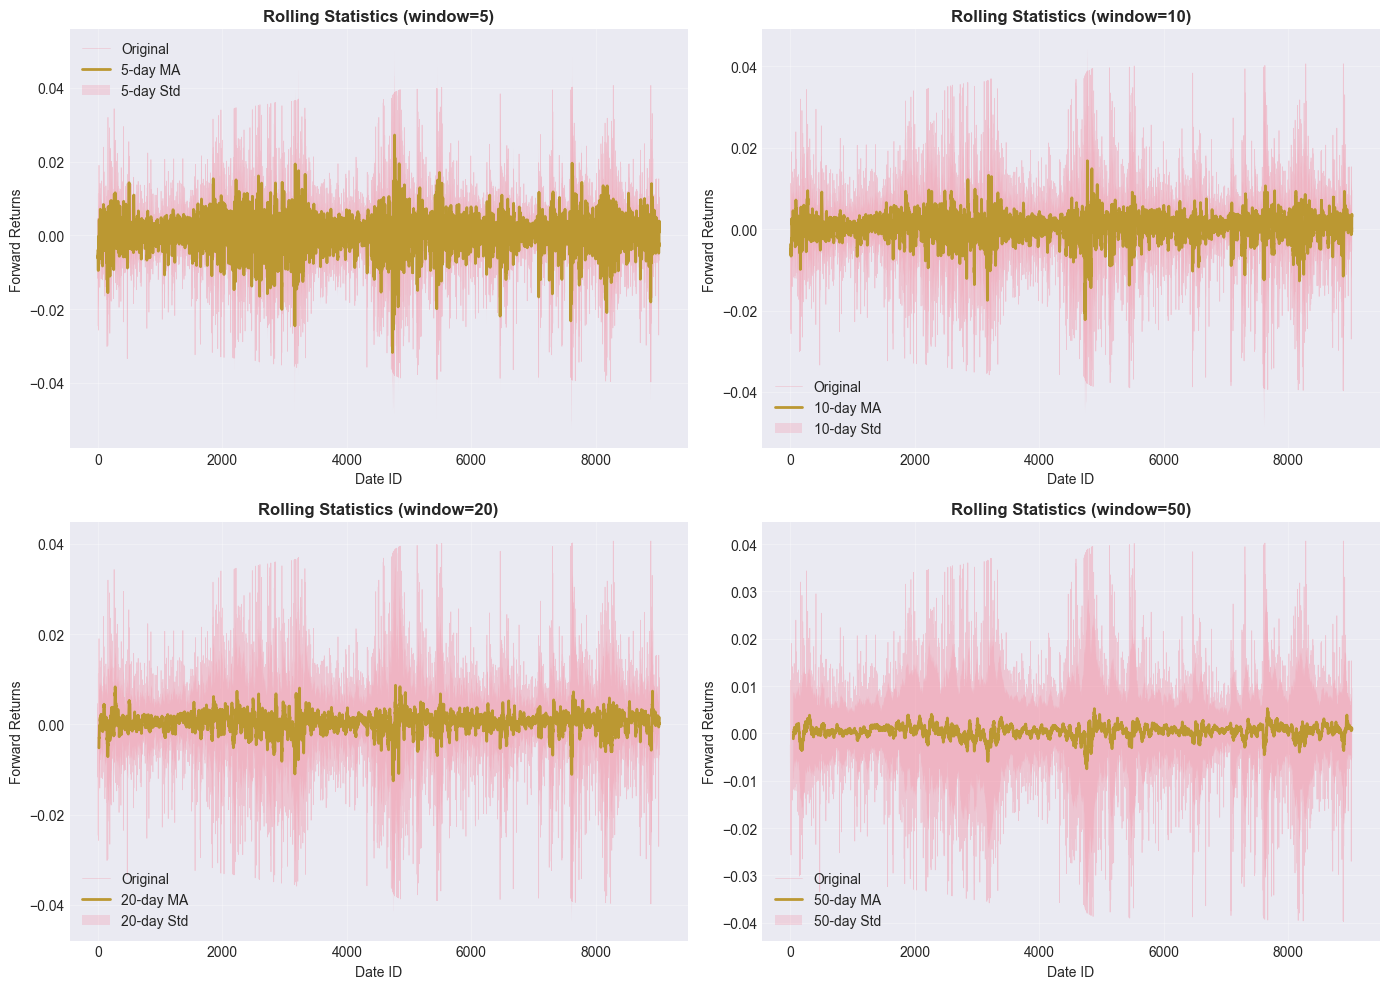

In [67]:
# 타겟 변수의 rolling statistics
window_sizes = [5, 10, 20, 50]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, window in enumerate(window_sizes):
    rolling_mean = train['forward_returns'].rolling(window=window).mean()
    rolling_std = train['forward_returns'].rolling(window=window).std()
    
    ax = axes[idx]
    ax.plot(train['date_id'], train['forward_returns'], alpha=0.3, label='Original', linewidth=0.5)
    ax.plot(train['date_id'], rolling_mean, label=f'{window}-day MA', linewidth=2)
    ax.fill_between(train['date_id'], 
                     rolling_mean - rolling_std, 
                     rolling_mean + rolling_std, 
                     alpha=0.2, label=f'{window}-day Std')
    ax.set_title(f'Rolling Statistics (window={window})', fontsize=12, weight='bold')
    ax.set_xlabel('Date ID')
    ax.set_ylabel('Forward Returns')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 📝 요약

이 노트북의 분석 결과를 바탕으로:
- `purge_final_test` 설정을 결정
- 필요시 두 설정으로 실험 진행
- LB 점수와 비교하여 최종 확정